In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import matplotlib.figure
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']}) ### if you use seaborn must add this

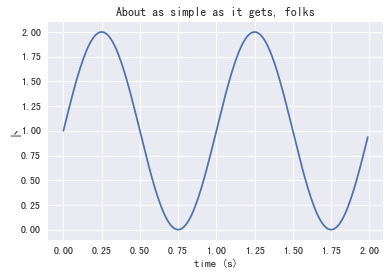

In [11]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('卜')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.savefig("test.png")
plt.show()

# 102級考寒假國考的數據
population: 102級、應屆考106-1醫師(一)、(二)的人，約130位報考的人，回收問卷52份(回收率~40%)

In [3]:
#load data
df = pd.read_pickle("../data/parsedData")
df.head()

,我的醫學一原始分數,我的醫學二原始分數,我「基礎」block考試成績最常有的十位數為？,我的103學年排名,我的104學年排名,出席率,準備天數,我自認我在課堂有專心在聽,在修習「臨床」block的時候，我會複習對應的「基礎學科」或「病理學」,規律運動,...,骨骼肌肉系統,我會把共筆看一遍,我會看原文書查找不懂的地方,我會把共筆看三遍以上,我會把考古題背起來,我會把共筆看三遍以上,考古題,我在上基礎block的時候，就已經在使用國考的複習教材(趙俊彥題庫、ganong等等),自己作筆記,共筆看兩遍
0,82,73,8,7.0,34.0,0.75,162,False,True,True,...,False,False,True,True,False,False,False,False,False,False
1,77,75,8,NaN,NaN,0.50,162,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,68,65,7,67.0,54.0,0.75,192,False,False,False,...,False,True,False,False,True,False,True,False,False,False
3,70,62,7,82.0,71.0,1.00,100,True,False,True,...,False,True,False,False,True,False,True,False,False,False
4,75,64,7,65.0,72.0,0.75,162,True,True,True,...,False,True,False,False,True,False,True,False,False,False


## 國考通過率 = 90%

通過率  0.905660377358


/home/hermuba/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


/home/hermuba/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


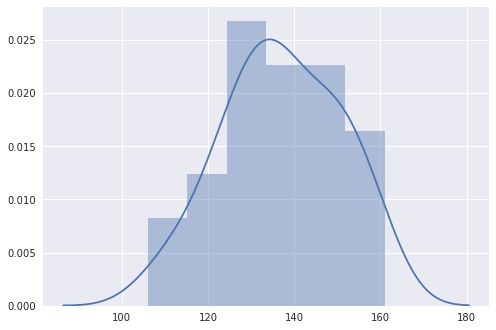

In [6]:
##這一次的通過率如何呢？



#通過率
score = list(df['我的醫學一原始分數']+df['我的醫學二原始分數'])
x = sum(i > 119 for i in score)/len(score)
print("通過率 ", x)

##bias: 沒過的人不想填問卷？
##bias: 沒辦法考的人?

sns.distplot(score)

## 過去成績對國考成績的影響？
### block 排名v.s.國考總分

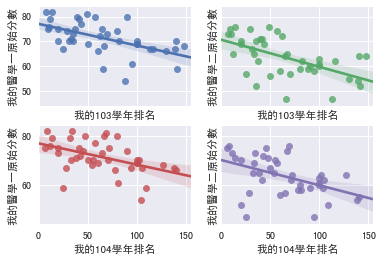

In [12]:
# regression: x = block; y = boards_score
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
sns.regplot(x='我的103學年排名', y='我的醫學一原始分數', data=df, ax = ax1)
sns.regplot(x='我的103學年排名', y='我的醫學二原始分數', data=df, ax = ax2)
sns.regplot(x='我的104學年排名', y='我的醫學一原始分數', data=df, ax = ax3)
sns.regplot(x='我的104學年排名', y='我的醫學二原始分數', data=df, ax = ax4)




## block 成績十位數 v.s. 國考成績
給予同學選項選取block考試最常有的十位數：0~10

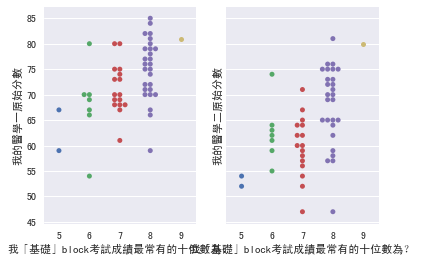

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.swarmplot(x='我「基礎」block考試成績最常有的十位數為？', y='我的醫學一原始分數', data=df, ax = ax1);
sns.swarmplot(x='我「基礎」block考試成績最常有的十位數為？', y='我的醫學二原始分數', data=df, ax = ax2);

# 過去課堂出席率 v.s. 國考成績
在此問卷中，出席率有五個選項：0%, 25%, 50%, 75%, 100%

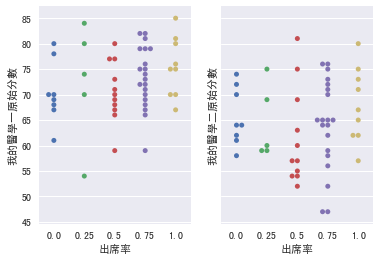

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.swarmplot(x='出席率', y='我的醫學一原始分數', data=df, ax = ax1);
sns.swarmplot(x='出席率', y='我的醫學二原始分數', data=df, ax = ax2);

## 出席&&有在聽 v.s 國考成績

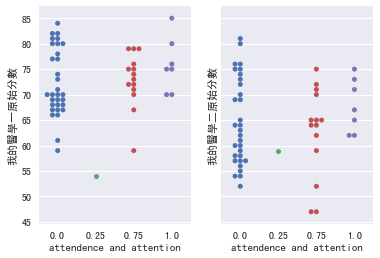

In [15]:
df['attendence and attention'] = df['出席率']*df['我自認我在課堂有專心在聽'] 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.swarmplot(x='attendence and attention', y='我的醫學一原始分數', data=df, ax = ax1);
sns.swarmplot(x='attendence and attention', y='我的醫學二原始分數', data=df, ax = ax2);

## 曾經被當 v.s. 國考成績

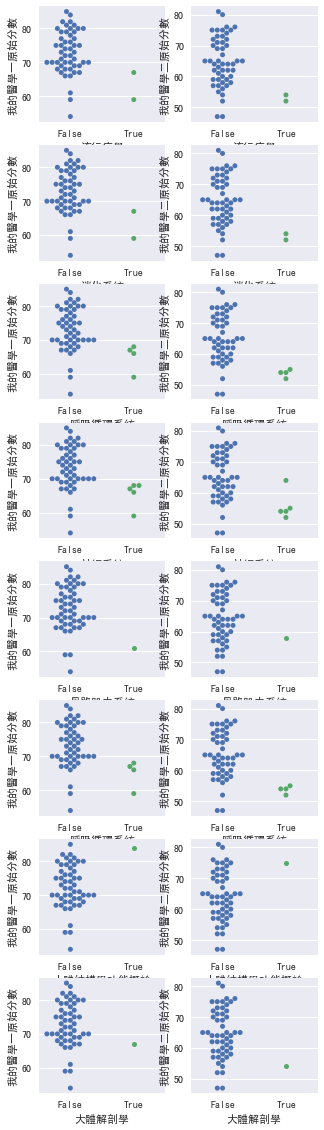

In [16]:
f, axarr = plt.subplots(8, 2, figsize = (5,20))
sns.swarmplot(x='流行病學', y='我的醫學一原始分數', data=df, ax = axarr[0,0])
sns.swarmplot(x='流行病學', y='我的醫學二原始分數', data=df, ax = axarr[0,1])
sns.swarmplot(x='消化系統', y='我的醫學一原始分數', data=df, ax = axarr[1,0])
sns.swarmplot(x='消化系統', y='我的醫學二原始分數', data=df, ax = axarr[1,1])
sns.swarmplot(x='呼吸循環系統', y='我的醫學一原始分數', data=df, ax = axarr[2,0])
sns.swarmplot(x='呼吸循環系統', y='我的醫學二原始分數', data=df, ax = axarr[2,1])
sns.swarmplot(x='神經系統', y='我的醫學一原始分數', data=df, ax = axarr[3,0])
sns.swarmplot(x='神經系統', y='我的醫學二原始分數', data=df, ax = axarr[3,1])
sns.swarmplot(x='骨骼肌肉系統', y='我的醫學一原始分數', data=df, ax = axarr[4,0])
sns.swarmplot(x='骨骼肌肉系統', y='我的醫學二原始分數', data=df, ax = axarr[4,1])
sns.swarmplot(x='呼吸循環系統', y='我的醫學一原始分數', data=df, ax = axarr[5,0])
sns.swarmplot(x='呼吸循環系統', y='我的醫學二原始分數', data=df, ax = axarr[5,1])
sns.swarmplot(x='人體結構與功能概論', y='我的醫學一原始分數', data=df, ax = axarr[6,0])
sns.swarmplot(x='人體結構與功能概論', y='我的醫學二原始分數', data=df, ax = axarr[6,1])
sns.swarmplot(x='大體解剖學', y='我的醫學一原始分數', data=df, ax = axarr[7,0])
sns.swarmplot(x='大體解剖學', y='我的醫學二原始分數', data=df, ax = axarr[7,1])

# 過去的念書情形

## 在修習「臨床」block的時候，我會複習對應的「基礎學科」或「病理學」: true or false


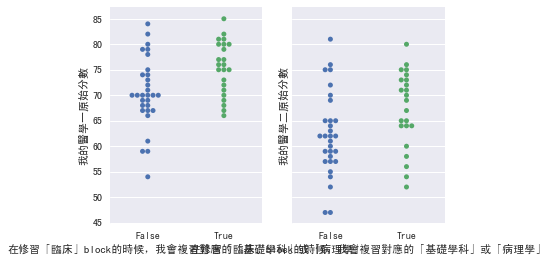

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.swarmplot(x='在修習「臨床」block的時候，我會複習對應的「基礎學科」或「病理學」', y='我的醫學一原始分數', data=df, ax = ax1);
sns.swarmplot(x='在修習「臨床」block的時候，我會複習對應的「基礎學科」或「病理學」', y='我的醫學二原始分數', data=df, ax = ax2);

## 我在上基礎block的時候，就已經在使用國考的複習教材(趙俊彥題庫、ganong等等)

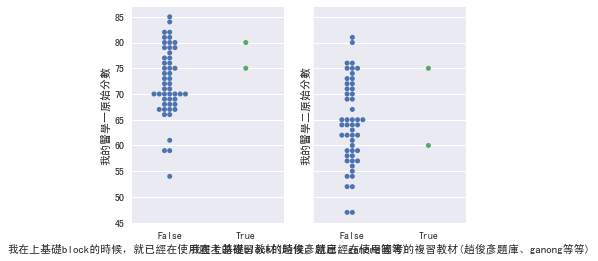

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.swarmplot(x='我在上基礎block的時候，就已經在使用國考的複習教材(趙俊彥題庫、ganong等等)', y='我的醫學一原始分數', data=df, ax = ax1);
sns.swarmplot(x='我在上基礎block的時候，就已經在使用國考的複習教材(趙俊彥題庫、ganong等等)', y='我的醫學二原始分數', data=df, ax = ax2);

## 原文書的功力

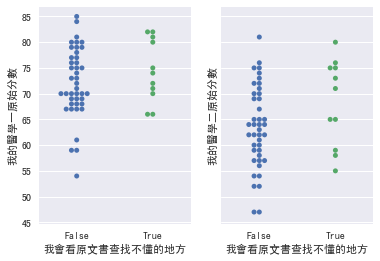

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.swarmplot(x='我會看原文書查找不懂的地方', y='我的醫學一原始分數', data=df, ax = ax1);
sns.swarmplot(x='我會看原文書查找不懂的地方', y='我的醫學二原始分數', data=df, ax = ax2);

## 對「共筆的熟悉程度」

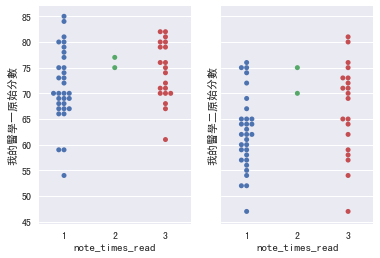

In [20]:
df['note_times_read'] = df['我會把共筆看一遍']*1 + df['共筆看兩遍']*2 + df['我會把共筆看三遍以上']*3
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.swarmplot(x='note_times_read', y='我的醫學一原始分數', data=df, ax = ax1);
sns.swarmplot(x='note_times_read', y='我的醫學二原始分數', data=df, ax = ax2);

## 考古題
當初寫的選項：我會把考古題背起來，但有人在comment裡堅持「我沒背」，因此最後只區分「使用與不使用考古題」

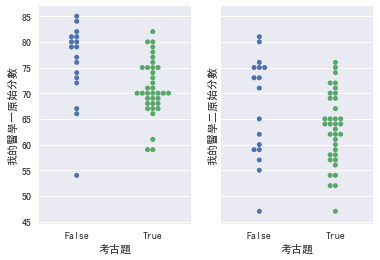

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.swarmplot(x='考古題', y='我的醫學一原始分數', data=df, ax = ax1);
sns.swarmplot(x='考古題', y='我的醫學二原始分數', data=df, ax = ax2);

### 考古題與block成績的interaction

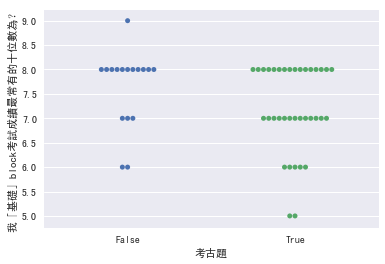

In [22]:
sns.swarmplot(x='考古題', y='我「基礎」block考試成績最常有的十位數為？', data=df)

# 準備情形
## 準備天數
當初的選項概略粗分為：暑假一開始、暑假中、暑假尾、期中考、期末考後；經換算成天數成為連續data

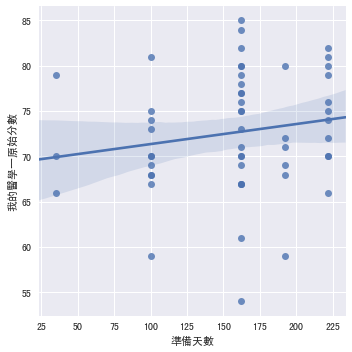

In [23]:
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.lmplot(x='準備天數', y='我的醫學一原始分數', data=df)


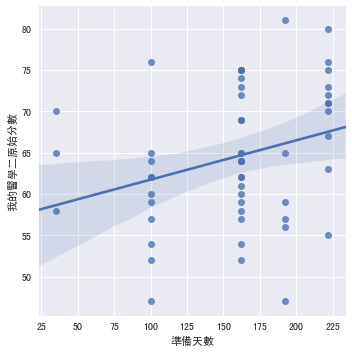

In [24]:
sns.lmplot(x='準備天數', y='我的醫學二原始分數', data=df)

## 解剖學準備方式
包含
1. 是否使用趙俊彥、聽幾遍
2. 是否寫照俊彥題庫、寫完了嗎
3. 是否放棄任何科目？放棄了什麼
## 趙神聽了幾遍呢？

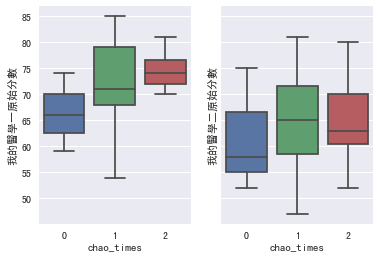

In [25]:
df['chao_times'] = df['聽完趙俊彥1遍'] + df['聽完趙俊彥２遍']*2
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(x='chao_times', y='我的醫學一原始分數', data=df, ax = ax1)
sns.boxplot(x='chao_times', y='我的醫學二原始分數', data=df, ax = ax2)

## 有寫趙俊彥題庫嗎

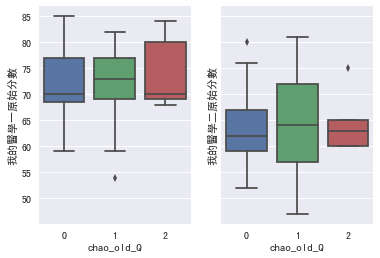

In [27]:
df['chao_old_Q'] = df['寫趙神題庫近數年題目'] + df['我寫完趙神了！(太猛啦)']*2
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(x='chao_old_Q', y='我的醫學一原始分數', data=df, ax = ax1)
sns.boxplot(x='chao_old_Q', y='我的醫學二原始分數', data=df, ax = ax2)

## 放棄幾科(解剖)